In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt
import math
from pandas import read_csv

data = read_csv('4.csv', header=0, index_col=0)
data.describe()

,2045,2326,1833,1
count,122200.000000,122200.000000,122200.000000,122200.000000
mean,2053.151244,2377.315663,2024.088453,3.904984
std,51.148140,56.854621,46.606461,2.313783
min,1132.000000,1649.000000,878.000000,0.000000
25%,2019.000000,2369.000000,2007.000000,1.000000
50%,2053.000000,2380.000000,2025.000000,4.000000
75%,2081.000000,2387.000000,2034.000000,7.000000
max,2723.000000,3046.000000,2954.000000,7.000000


In [2]:
###LPF
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
fs = 5446.0       # sample rate
fc = 544.6        # cutoff

t = []
x = []
y = []
z = []

for i in range(len(data.values)):
  x.append(data.values[i][0])
  
for i in range(len(data.values)):
  t.append(i)

for i in range(len(data.values)):
  y.append(data.values[i][1])
  
for i in range(len(data.values)):
  z.append(data.values[i][2])

###menjadikan array numpy agar bisa di plotx=np.array(x)
t=np.array(t)
y=np.array(y)
z=np.array(z)

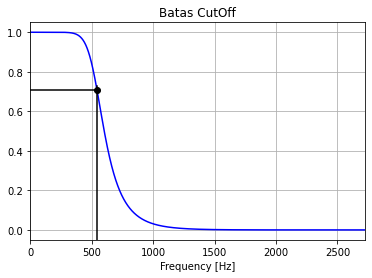

In [4]:
# cek respon frequensi
b, a = butter_lowpass(fc, fs)

w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc,ymax=0.5*np.sqrt(2), color='k')
plt.axhline(0.5*np.sqrt(2),xmax = fc/(fs/2), color='k')
plt.xlim(0, 0.5*fs)
plt.title("Batas CutOff")
plt.xlabel('Frequency [Hz]')
plt.grid()

lpfx = butter_lowpass_filter(x, fc, fs)
lpfy = butter_lowpass_filter(y, 609.2, 6092)
lpfz = butter_lowpass_filter(z, 590.8, 5908)

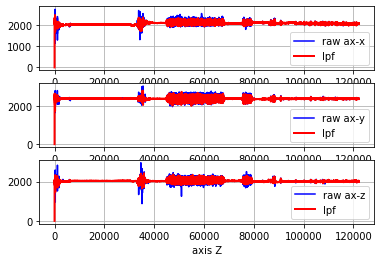

In [5]:
plt.subplot(3, 1, 1)
plt.plot(t, x, 'b-', label='raw ax-x')
plt.plot(t, lpfx, 'r-', linewidth=2, label='lpf')
plt.xlabel('axis X')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t,y, 'b-', label='raw ax-y')
plt.plot(t, lpfy, 'r-', linewidth=2, label='lpf')
plt.xlabel('axis Y')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, 'b-', label='raw ax-z')
plt.plot(t, lpfz, 'r-', linewidth=2, label='lpf')
plt.xlabel('axis Z')
plt.grid()
plt.legend()

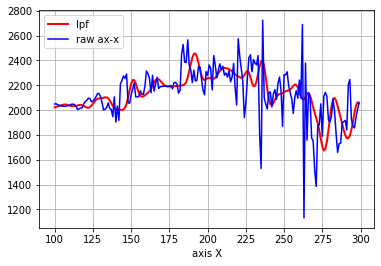

In [6]:
plt.plot(t[100:300], lpfx[100:300], 'r-', linewidth=2, label='lpf')
plt.plot(t[100:300], x[100:300], 'b-', label='raw ax-x')
plt.xlabel('axis X')
plt.grid()
plt.legend()

In [7]:
###MVA
window = 10
def moving_average(_data,window):
  result = []
  data = _data
  for a in range(window):
    data = np.insert(data,0,data[0])
  for i in range(window,len(data)):
    x = data[i]
    for j in range(window):
      x += data[i-j]
    avg = x/(window+1)
    result.append(avg)

  return result

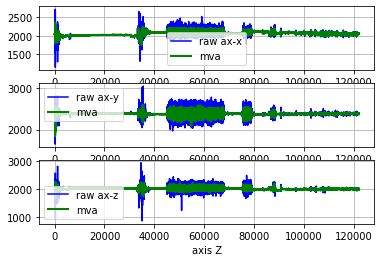

In [8]:
mvax=moving_average(x,window)
mvay=moving_average(y,window)
mvaz=moving_average(z,window)

plt.subplot(3, 1, 1)
plt.plot(t, x, 'b-', label='raw ax-x')
plt.plot(t, mvax, 'g-', linewidth=2, label='mva')
plt.xlabel('axis X')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t,y, 'b-', label='raw ax-y')
plt.plot(t, mvay, 'g-', linewidth=2, label='mva')
plt.xlabel('axis Y')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, 'b-', label='raw ax-z')
plt.plot(t, mvaz, 'g-', linewidth=2, label='mva')
plt.xlabel('axis Z')
plt.grid()
plt.legend()

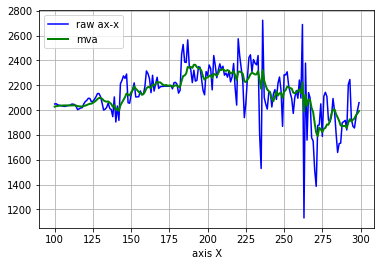

In [9]:
plt.plot(t[100:300], x[100:300], 'b-', label='raw ax-x')
plt.plot(t[100:300], mvax[100:300], 'g-', linewidth=2, label='mva')
plt.xlabel('axis X')
plt.grid()
plt.legend()

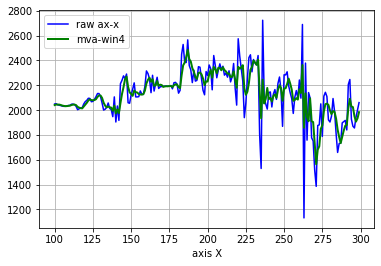

In [10]:
mvax2=moving_average(x,4)
plt.plot(t[100:300], x[100:300], 'b-', label='raw ax-x')
plt.plot(t[100:300], mvax2[100:300], 'g-', linewidth=2, label='mva-win4')
plt.xlabel('axis X')
plt.grid()
plt.legend()


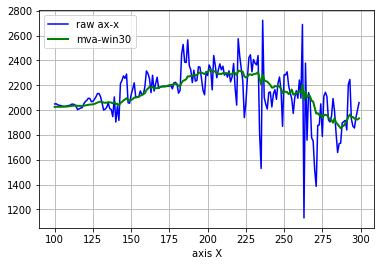

In [11]:
mvax3=moving_average(x,20)
plt.plot(t[100:300], x[100:300], 'b-', label='raw ax-x')
plt.plot(t[100:300], mvax3[100:300], 'g-', linewidth=2, label='mva-win30')
plt.xlabel('axis X')
plt.grid()
plt.legend()

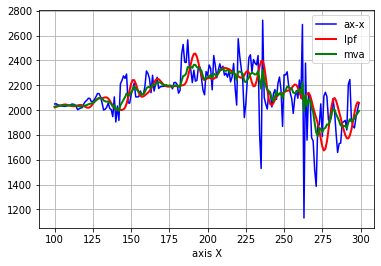

In [12]:
###compare data
plt.plot(t[100:300], x[100:300], 'b-', label='ax-x')
plt.plot(t[100:300], lpfx[100:300], 'r-', linewidth=2, label='lpf')
plt.plot(t[100:300], mvax[100:300], 'g-', linewidth=2, label='mva')
plt.xlabel('axis X')
plt.grid()
plt.legend()